# Model

In [115]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [116]:
import math

In [117]:
df = pd.read_csv('episode_statistics.csv')

In [118]:
df.head()

,season,title,rating,votes,double,episode,month,director,writer,writer_B.J._Novak,...,Michael_about_Holly,what_she_said,laughs,singing,applause,accent,unhappy,smile,sigh,phone
0,1,Pilot,7.4,7006,0,1,3,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,0,...,0.0,0.0,5,1,0,0,1,0,1,4
1,1,Diversity Day,8.3,6902,0,2,3,Ken Kwapis,B.J. Novak,1,...,0.0,0.0,2,0,0,3,1,0,0,2
2,1,Health Care,7.7,5756,0,3,4,Ken Whittingham,Paul Lieberstein,0,...,0.0,0.0,3,0,1,0,0,0,0,6
3,1,The Alliance,8.0,5579,0,4,4,Bryan Gordon,Michael Schur,0,...,0.0,0.0,6,1,0,0,0,0,0,2
4,1,Basketball,8.4,6183,0,5,4,Greg Daniels,Greg Daniels,0,...,0.0,0.0,3,3,2,0,0,0,0,1


## Correlation with rating

### writer

In [162]:
writers = [writer for writer in df.columns if 'writer_' in writer]

In [130]:
df_writer = df[np.insert(writers,0,'rating')].corr().rating.sort_values(ascending=False)
df_writer = pd.DataFrame(df_writer)

In [131]:
df[df.writer_Michael_Schur==1].rating.mean()

8.61

In [132]:
df_writer['counts'] = np.nan
df_writer['mean_rating'] = np.nan
for writer in df_writer.index:
    if writer != 'rating':
        count = df[writer].sum()
        
        df_writer.loc[(df_writer.index == writer),['counts']] = count
        df_writer.loc[(df_writer.index == writer),['mean_rating']] = df[df[writer]==1].rating.mean()

In [133]:
df_writer[df_writer.counts > 10].sort_values('mean_rating',ascending=False)

,rating,counts,mean_rating
writer_Greg_Daniels,0.221293,12.0,8.725000
writer_Jennifer_Celotta,0.133688,11.0,8.536364
writer_Paul_Lieberstein,0.161015,16.0,8.531250
writer_Gene_Stupnitsky,0.120830,15.0,8.460000
writer_Lee_Eisenberg,0.120830,15.0,8.460000
writer_Mindy_Kaling,0.085353,21.0,8.357143
writer_Brent_Forrester,0.058915,11.0,8.354545
writer_B.J._Novak,0.056053,15.0,8.326667
writer_Justin_Spitzer,0.010312,11.0,8.236364


Writer for model:   
writer_Greg_Daniels   
writer_Jennifer_Celotta   
writer_Paul_Lieberstein   
writer_Gene_Stupnitsky   
writer_Lee_Eisenberg   	

### director

In [136]:
directors = [director for director in df.columns if 'director_' in director]

In [137]:
df_director = df[np.insert(directors,0,'rating')].corr().rating.sort_values(ascending=False)
df_director = pd.DataFrame(df_director)

In [138]:
df_director['counts'] = np.nan
df_director['mean_rating'] = np.nan

for director in df_director.index:
    if director != 'rating':
        count = df[director].sum()
        df_director.loc[(df_director.index == director),['counts']] = count
        df_director.loc[(df_director.index == director),['mean_rating']] = df[df[director]==1].rating.mean()

In [139]:
df_director[df_director.counts > 10].sort_values('mean_rating',ascending=False)

,rating,counts,mean_rating
director_Paul_Feig,0.228710,14.0,8.700000
director_Ken_Kwapis,0.135138,12.0,8.525000
director_Greg_Daniels,0.149980,15.0,8.520000
director_Jeffrey_Blitz,0.029005,11.0,8.281818
director_Randall_Einhorn,-0.060546,15.0,8.086667


Director for model:   
director_Paul_Feig	
director_Ken_Kwapis   
director_Greg_Daniels

# Choose features for model - by hand

In [6]:
pd.set_option('display.max_rows', None)  # None - for all rows, 10 - for 10 rows

In [178]:
skip_list = ['episode','votes','season'] + list(writers)+list(directors)

In [180]:
rating_corr = df.drop(columns=skip_list,axis=1).corr().rating.sort_values(ascending=False)

In [193]:
df_corr = pd.DataFrame(rating_corr)

count episodes where this properties appear

In [194]:
df['one'] = 1

In [195]:
df_corr['count_episode'] = np.nan
for name in df_corr.index:
    df_corr.loc[df_corr.index==name,'count_episode'] = df[df[name]!= 0].one.sum()

In [244]:
df_corr[df_corr.count_episode > 60]

,rating,count_episode
rating,1.000000,186.0
Michael_words,0.425879,137.0
words,0.320172,186.0
unhappy,0.315144,70.0
sigh,0.204765,78.0
Pam_about_Michael,0.167265,98.0
Jim_about_Pam,0.147887,94.0
Jim_about_Dwight,0.139549,98.0
phone,0.113813,167.0
party,0.088791,78.0


In [245]:
high_stat = df_corr[df_corr.count_episode > 60].index

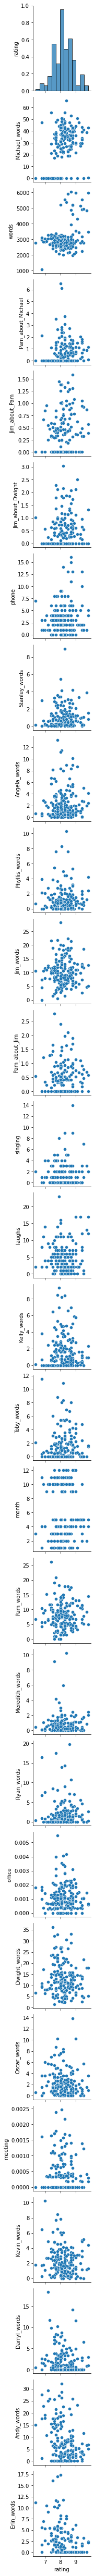

In [201]:
sns.pairplot(data=df,x_vars=['rating'], y_vars=high_stat)

## leave features with high corellation

In [246]:
rating_high_corr = df_corr[(df_corr.count_episode > 60) & (abs(df_corr.rating) > 0.10)]
rating_high_corr = pd.DataFrame(rating_high_corr)
rating_high_corr

,rating,count_episode
rating,1.000000,186.0
Michael_words,0.425879,137.0
words,0.320172,186.0
unhappy,0.315144,70.0
sigh,0.204765,78.0
Pam_about_Michael,0.167265,98.0
Jim_about_Pam,0.147887,94.0
Jim_about_Dwight,0.139549,98.0
phone,0.113813,167.0
meeting,-0.110045,95.0


## delete features, higly corellated with other features

In [247]:
cols = list(rating_high_corr.index) + ['writer_Greg_Daniels','writer_Jennifer_Celotta','writer_Paul_Lieberstein','writer_Gene_Stupnitsky','writer_Lee_Eisenberg']+['director_Paul_Feig','director_Ken_Kwapis','director_Greg_Daniels']

<AxesSubplot:>

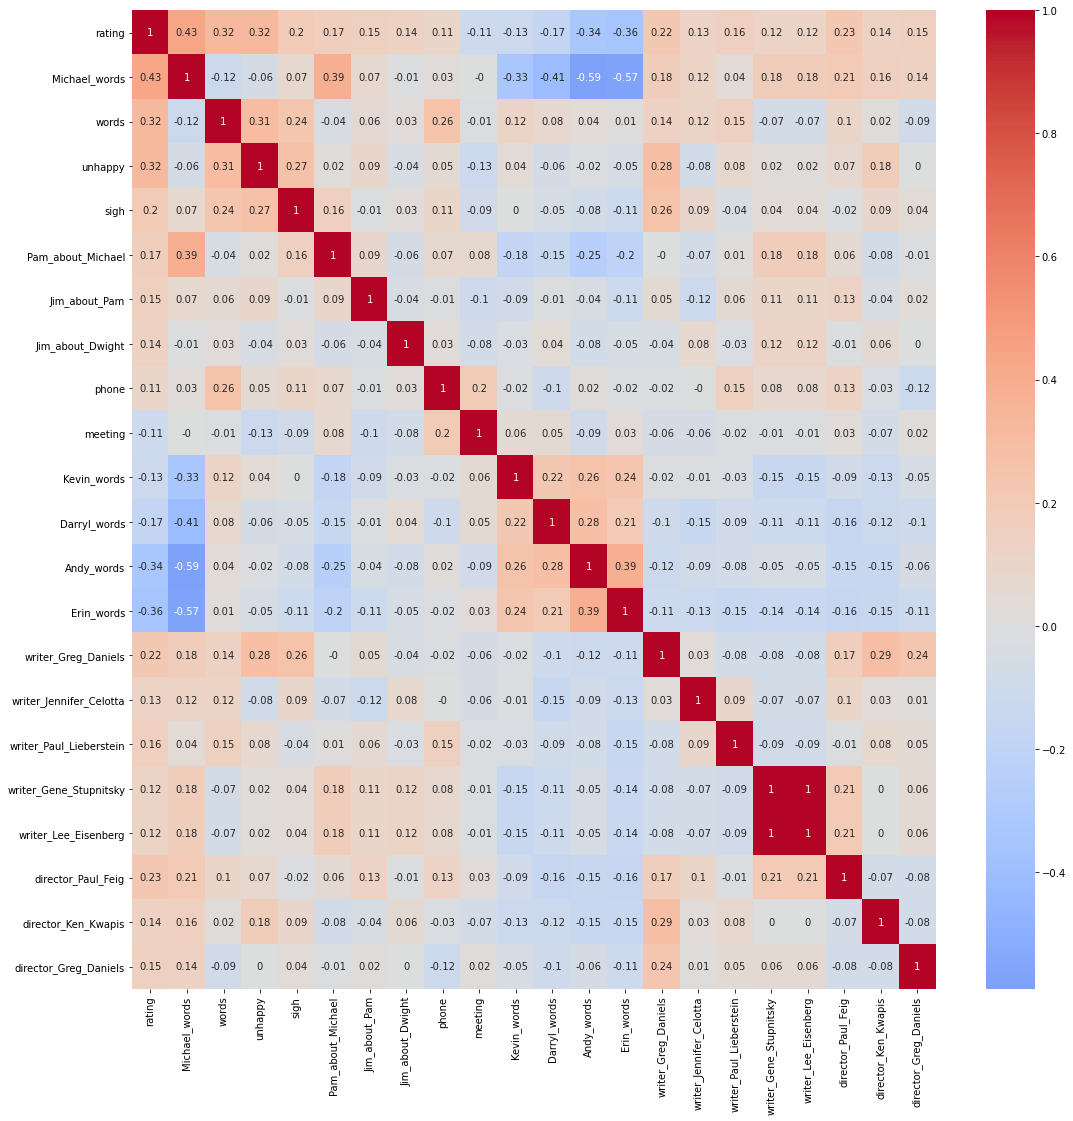

In [248]:
df_tmp = df[cols]

corr = df_tmp.corr().round(2)
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', center=0,annot=True)

In [288]:
delete_list = ['words','sigh','Kevin_words','Erin_words','Andy_words','Darryl_words','writer_Greg_Daniels','writer_Lee_Eisenberg','Pam_about_Michael','director_Ken_Kwapis','director_Paul_Feig']

cols_for_model = [item for item in cols if item not in delete_list]

In [411]:
delete_list = ['words','sigh','Michael_words','writer_Lee_Eisenberg','Andy_words','writer_Greg_Daniels','writer_Gene_Stupnitsky','Kevin_words']
cols_for_model = [item for item in cols if item not in delete_list]

<AxesSubplot:>

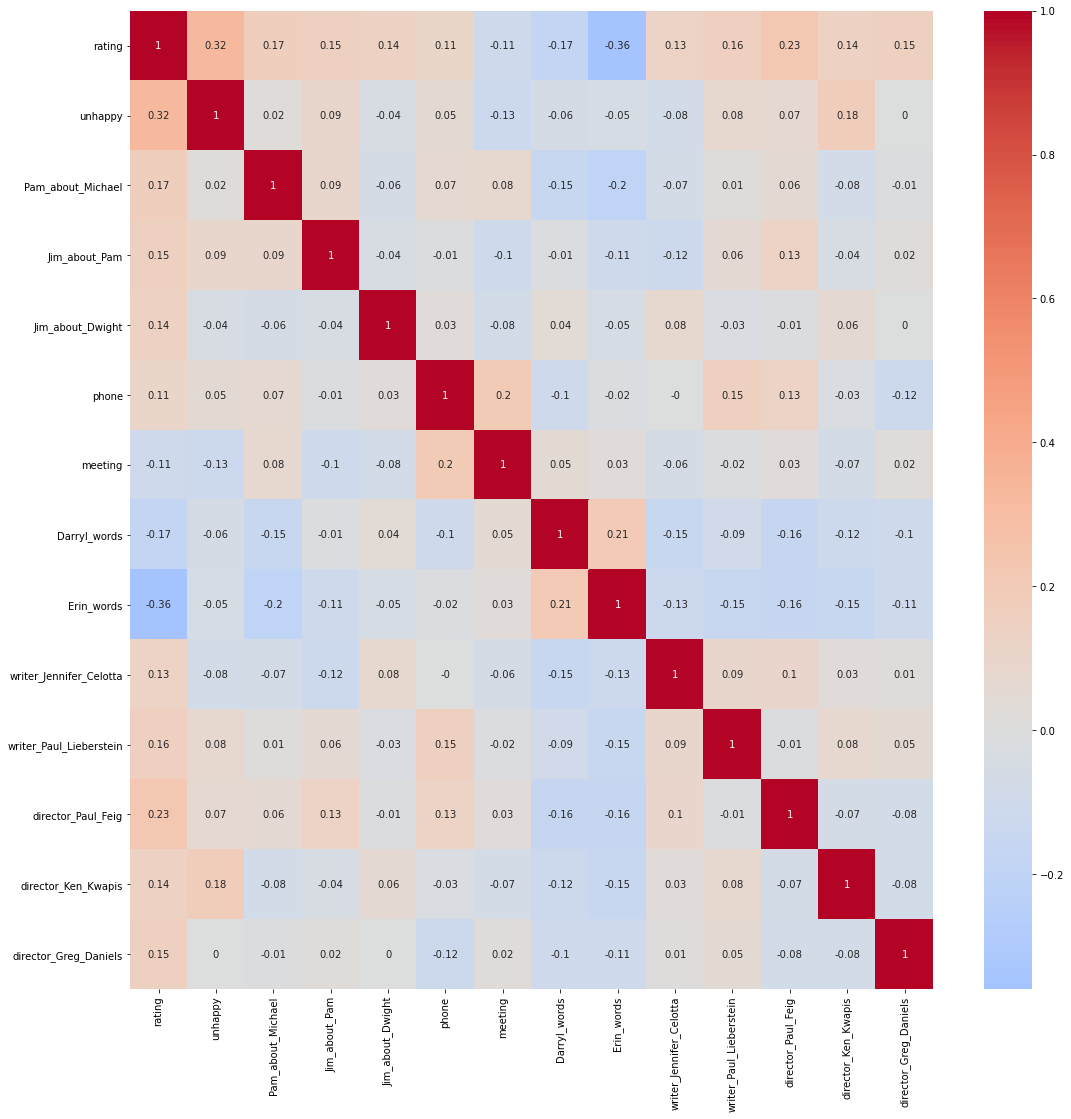

In [412]:
df_tmp = df[cols_for_model]

corr = df_tmp.corr().round(2)
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', center=0,annot=True)

# Normalise votes

In [444]:
total = df.votes.sum()
total

765842

In [445]:
df['votes_norm'] = df.votes/total

In [446]:
df.votes_norm.sum()

1.0

In [447]:
df.votes_norm

0      0.009148
1      0.009012
2      0.007516
3      0.007285
4      0.008073
5      0.007175
6      0.008075
7      0.006919
8      0.006854
9      0.006768
10     0.006342
11     0.006355
12     0.006692
13     0.006044
14     0.006223
15     0.006892
16     0.006641
17     0.007991
18     0.005899
19     0.005830
20     0.005786
21     0.005811
22     0.006185
23     0.005993
24     0.005787
25     0.005905
26     0.006042
27     0.008738
28     0.007772
29     0.005685
30     0.005957
31     0.005701
32     0.005547
33     0.005801
34     0.005707
35     0.005952
36     0.005959
37     0.006256
38     0.005658
39     0.005707
40     0.005996
41     0.005544
42     0.005616
43     0.006521
44     0.005551
45     0.006330
46     0.005897
47     0.005817
48     0.005901
49     0.006804
50     0.007158
51     0.006614
52     0.005450
53     0.005307
54     0.005715
55     0.005860
56     0.005419
57     0.005202
58     0.005530
59     0.010711
60     0.005121
61     0.005322
62     0

# Linear regression

In [229]:
import statsmodels.formula.api as smf

In [448]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30)

In [364]:
def RMSE(y, y_pred):
    SME = sum((y - y_pred)**2)
    
    return round(math.sqrt(SME/len(y)),3)

In [251]:
formula = 'rating ~ '

for value in cols_for_model:
    if value != 'rating':
        formula += value + " + "

formula = formula[:-2]
formula

'rating ~ Michael_words + words + unhappy + sigh + Jim_about_Pam + Jim_about_Dwight + phone + meeting + writer_Greg_Daniels + writer_Jennifer_Celotta + writer_Paul_Lieberstein + writer_Gene_Stupnitsky + director_Paul_Feig + director_Greg_Daniels '

In [252]:
model = smf.ols(formula, data=train)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     6.271
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.69e-09
Time:                        12:04:31   Log-Likelihood:                -81.958
No. Observations:                 130   AIC:                             193.9
Df Residuals:                     115   BIC:                             236.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.0833      0.190     37.332      0.000       6.708       7.459
Michael_words               0.0128      0.003      4.647      0.000       0.007       0.018
words                       0.0002   5.72e-05      3.133      0.002     6.6e-05       0.000
unhappy                     0.1207      0.041      2.919      0.004       0.039       0.203
sigh                        0.0211      0.035      0.597      0.552      -0.049       0.091
Jim_about_Pam               0.1399      0.107      1.305      0.194      -0.072       0.352
Jim_about_Dwight            0.0948      0.069      1.383      0.169      -0.041       0.231
phone                       0.0030      0.015      0.201      0.841      -0.027       0.033
meeting                   -47.4080     81.050     -0.585      0.560    -207.953     113.137
writer_Greg_Daniels        -0.0678      0.185     -0.367      0.714      -0.434       0.299
writer_Jennifer_Celotta     0.1527      0.203      0.752      0.454      -0.250       0.555
writer_Paul_Lieberstein     0.1013      0.163      0.622      0.535      -0.222       0.424
writer_Gene_Stupnitsky      0.0489      0.158      0.310      0.758      -0.264       0.362
director_Paul_Feig          0.2546      0.154      1.652      0.101      -0.051       0.560
director_Greg_Daniels       0.3014      0.157      1.926      0.057      -0.009       0.611
==============================================================================
Omnibus:                        3.659   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.207
Skew:                           0.275   Prob(JB):                        0.201
Kurtosis:                       3.538   Cond. No.                     6.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='rating'>

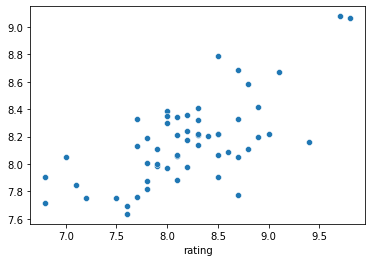

In [253]:
prediction = results.predict(test.drop(columns='rating', axis=1))

sns.scatterplot(x=test.rating, y=prediction)

In [254]:
RMSE(test.rating.values, prediction.values)

0.47

## formula - delete features with high p

In [462]:
formula = 'rating ~ Michael_words + words + unhappy + Jim_about_Pam + Jim_about_Dwight +  director_Paul_Feig + director_Greg_Daniels '

model = smf.ols(formula, data=train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     12.85
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.73e-12
Time:                        13:59:45   Log-Likelihood:                -89.478
No. Observations:                 130   AIC:                             195.0
Df Residuals:                     122   BIC:                             217.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.9353      0.183     37.846      0.000       6.573       7.298
Michael_words             0.0146      0.003      5.591      0.000       0.009       0.020
words                     0.0002   5.22e-05      4.224      0.000       0.000       0.000
unhappy                   0.1365      0.038      3.637      0.000       0.062       0.211
Jim_about_Pam             0.1009      0.113      0.892      0.374      -0.123       0.325
Jim_about_Dwight          0.1565      0.073      2.131      0.035       0.011       0.302
director_Paul_Feig        0.1312      0.182      0.722      0.472      -0.228       0.491
director_Greg_Daniels     0.2939      0.148      1.990      0.049       0.002       0.586
==============================================================================
Omnibus:                        1.416   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.023
Skew:                           0.197   Prob(JB):                        0.600
Kurtosis:                       3.181   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

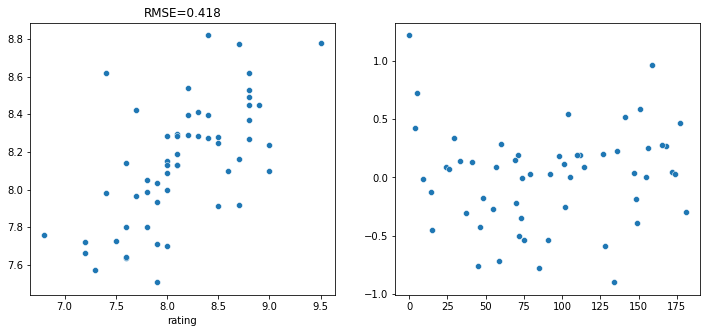

In [467]:
prediction = results.predict(test.drop(columns='rating', axis=1))

fig, ax = plt.subplots(figsize=(12,5),ncols=2, nrows=1)
sns.scatterplot(x=test.rating, y=prediction, ax=ax[0]).set(title=f"RMSE={RMSE(test.rating.values, prediction.values)}")
sns.scatterplot(x=test.index, y=prediction-test.rating, ax=ax[1])

## Weighted

In [500]:
formula = 'rating ~ Michael_words + words + unhappy + Jim_about_Pam + Jim_about_Dwight +  director_Paul_Feig + director_Greg_Daniels '

train_tmp = train.copy(deep=True)
train_tmp['Michael_words'] = (train_tmp['Michael_words'])

model = smf.wls(formula, data=train_tmp, weights=train.votes_norm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.491
Model:                            WLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     16.80
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.16e-15
Time:                        18:21:38   Log-Likelihood:                -97.128
No. Observations:                 130   AIC:                             210.3
Df Residuals:                     122   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.9463      0.192     36.094      0.000       6.565       7.327
Michael_words             0.0140      0.003      4.955      0.000       0.008       0.020
words                     0.0002   5.16e-05      4.568      0.000       0.000       0.000
unhappy                   0.1617      0.032      4.989      0.000       0.098       0.226
Jim_about_Pam             0.1383      0.118      1.170      0.244      -0.096       0.372
Jim_about_Dwight          0.1395      0.075      1.854      0.066      -0.009       0.289
director_Paul_Feig        0.1351      0.166      0.813      0.418      -0.194       0.464
director_Greg_Daniels     0.2691      0.147      1.832      0.069      -0.022       0.560
==============================================================================
Omnibus:                        7.877   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.911
Skew:                           0.477   Prob(JB):                       0.0191
Kurtosis:                       3.742   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Count'>

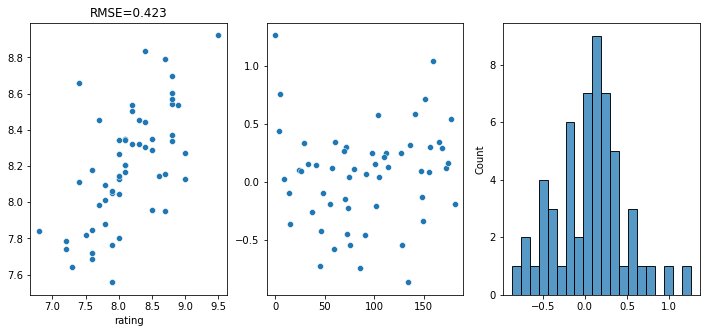

In [501]:
prediction = results.predict(test.drop(columns='rating', axis=1))
residuals = prediction-test.rating

fig, ax = plt.subplots(figsize=(12,5),ncols=3, nrows=1)
sns.scatterplot(x=test.rating, y=prediction, ax=ax[0]).set(title=f"RMSE={RMSE(test.rating.values, prediction.values)}")
sns.scatterplot(x=test.index, y=residuals, ax=ax[1])
sns.histplot(residuals,ax=ax[2],bins=20)

<AxesSubplot:ylabel='rating'>

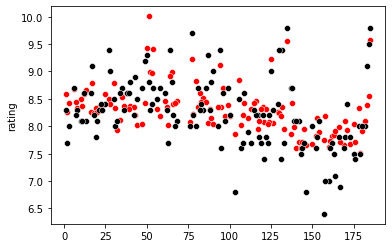

In [504]:
sns.scatterplot(y=results.predict(train.drop(columns='rating', axis=1)),
               x=train.index,color='red')

sns.scatterplot(y=train.rating,
               x=train.index,color='black')

## formula - delete higly correlated (>0.2) features

In [290]:
formula = 'rating ~ '

for value in cols_for_model:
    if value != 'rating':
        formula += value + " + "

formula = formula[:-2]
formula

'rating ~ Michael_words + unhappy + Jim_about_Pam + Jim_about_Dwight + phone + meeting + writer_Jennifer_Celotta + writer_Paul_Lieberstein + writer_Gene_Stupnitsky + director_Greg_Daniels '

In [311]:
formula = 'rating ~ Michael_words + unhappy + Jim_about_Pam + Jim_about_Dwight + phone + writer_Jennifer_Celotta + director_Greg_Daniels '

In [312]:
model = smf.ols(formula, data=train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     9.655
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.61e-09
Time:                        12:30:04   Log-Likelihood:                -90.177
No. Observations:                 130   AIC:                             196.4
Df Residuals:                     122   BIC:                             219.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.5517      0.101     74.420      0.000       7.351       7.753
Michael_words               0.0121      0.003      4.614      0.000       0.007       0.017
unhappy                     0.1681      0.039      4.353      0.000       0.092       0.245
Jim_about_Pam               0.2167      0.107      2.017      0.046       0.004       0.429
Jim_about_Dwight            0.1032      0.070      1.481      0.141      -0.035       0.241
phone                       0.0220      0.014      1.567      0.120      -0.006       0.050
writer_Jennifer_Celotta     0.3471      0.200      1.734      0.085      -0.049       0.743
director_Greg_Daniels       0.2514      0.156      1.616      0.109      -0.057       0.559
==============================================================================
Omnibus:                        4.347   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.849
Skew:                           0.334   Prob(JB):                        0.146
Kurtosis:                       3.513   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0.5, 1.0, 'RMSE=0.51')]

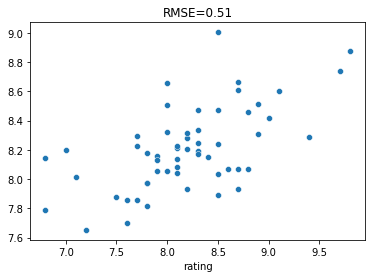

In [313]:
prediction = results.predict(test.drop(columns='rating', axis=1))

sns.scatterplot(x=test.rating, y=prediction).set(title=f"RMSE={RMSE(test.rating.values, prediction.values)}")


<AxesSubplot:>

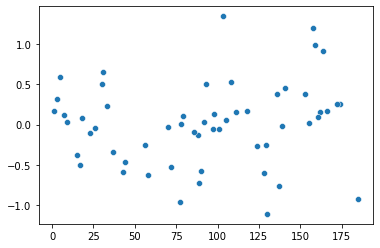

In [314]:
sns.scatterplot(x=test.index, y=prediction-test.rating)

## without Michael words

In [413]:
formula = 'rating ~ '

for value in cols_for_model:
    if value != 'rating':
        formula += value + " + "

formula = formula[:-2]
formula

'rating ~ unhappy + Pam_about_Michael + Jim_about_Pam + Jim_about_Dwight + phone + meeting + Darryl_words + Erin_words + writer_Jennifer_Celotta + writer_Paul_Lieberstein + director_Paul_Feig + director_Ken_Kwapis + director_Greg_Daniels '

In [425]:
formula = 'rating ~ unhappy + Pam_about_Michael + Jim_about_Pam + Jim_about_Dwight + phone +  Erin_words + writer_Jennifer_Celotta + director_Paul_Feig + director_Greg_Daniels '

In [426]:
model = smf.ols(formula, data=train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     7.108
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.32e-08
Time:                        13:45:49   Log-Likelihood:                -91.058
No. Observations:                 130   AIC:                             202.1
Df Residuals:                     120   BIC:                             230.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.8572      0.109     72.112      0.000       7.641       8.073
unhappy                     0.1596      0.039      4.050      0.000       0.082       0.238
Pam_about_Michael           0.0845      0.054      1.570      0.119      -0.022       0.191
Jim_about_Pam               0.1619      0.112      1.439      0.153      -0.061       0.385
Jim_about_Dwight            0.1077      0.071      1.521      0.131      -0.033       0.248
phone                       0.0236      0.014      1.657      0.100      -0.005       0.052
Erin_words                 -0.0329      0.014     -2.434      0.016      -0.060      -0.006
writer_Jennifer_Celotta     0.3509      0.205      1.709      0.090      -0.056       0.758
director_Paul_Feig          0.3375      0.152      2.221      0.028       0.037       0.638
director_Greg_Daniels       0.3364      0.159      2.121      0.036       0.022       0.651
==============================================================================
Omnibus:                        1.476   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.325
Skew:                           0.247   Prob(JB):                        0.516
Kurtosis:                       2.976   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0.5, 1.0, 'RMSE=0.555')]

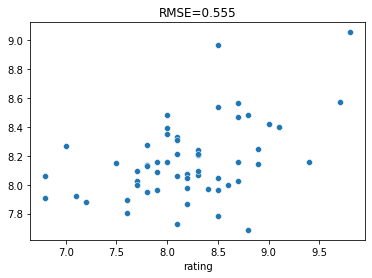

In [427]:
prediction = results.predict(test.drop(columns='rating', axis=1))

sns.scatterplot(x=test.rating, y=prediction).set(title=f"RMSE={RMSE(test.rating.values, prediction.values)}")


# Decision tree

In [323]:
pd.set_option('display.max_rows', None)

In [453]:
x_train = train.drop(columns=['rating','title','season','episode','votes','votes_norm','director','writer'],axis=1)

In [454]:
x_test = test.drop(columns=['rating','title','season','episode','votes','votes_norm','director','writer'],axis=1)

Number of tree

In [457]:
from sklearn.ensemble import RandomForestRegressor

n_trees = [10, 50, 100, 500, 1000,10000]
for n in n_trees:
    dtree = RandomForestRegressor(max_features=60,n_estimators=n)
    dtree.fit(x_train,train.rating,sample_weight=train.votes_norm)
    
    prediction = dtree.predict(x_test)
    print(n, RMSE(test.rating.values, prediction))

10 0.449
50 0.412
100 0.418
500 0.404
1000 0.412
10000 0.407


number of features

In [458]:
from sklearn.ensemble import RandomForestRegressor

n_features = [30,60,90,120]
for n in n_features:
    dtree = RandomForestRegressor(max_features=n, n_estimators=500)
    dtree.fit(x_train,train.rating, sample_weight=train.votes_norm)
    
    prediction = dtree.predict(x_test)
    print(n, RMSE(test.rating.values, prediction))

30 0.415
60 0.406
90 0.41
120 0.408


In [459]:
dtree = RandomForestRegressor(max_features=60, n_estimators=500)
dtree.fit(x_train,train.rating, sample_weight=train.votes_norm)

prediction = dtree.predict(x_test)
print(n, RMSE(test.rating.values, prediction))

120 0.409


In [433]:
dtree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 90,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

[Text(0.5, 1.0, 'RMSE=0.409')]

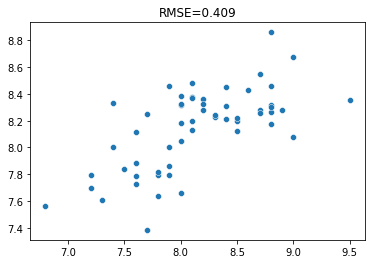

In [460]:
prediction = dtree.predict(x_test)

sns.scatterplot(x=test.rating.values, y=prediction).set(title=f"RMSE={RMSE(test.rating.values, prediction)}")

<AxesSubplot:ylabel='Count'>

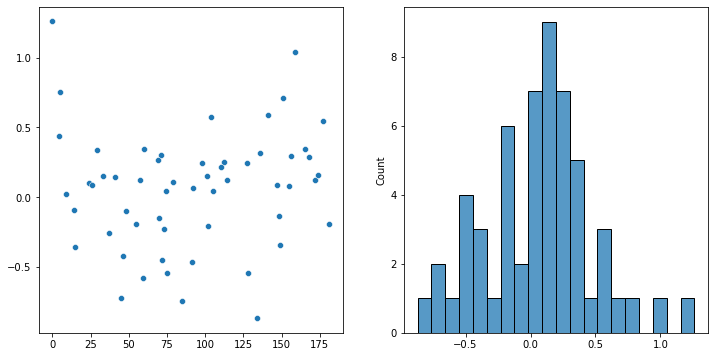

In [479]:
residuals = prediction-test.rating.values

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
sns.scatterplot(x=test.index, y=residuals,ax=ax[0])
sns.histplot(residuals, ax=ax[1],bins=20)

<AxesSubplot:xlabel='Importance', ylabel='Variable'>

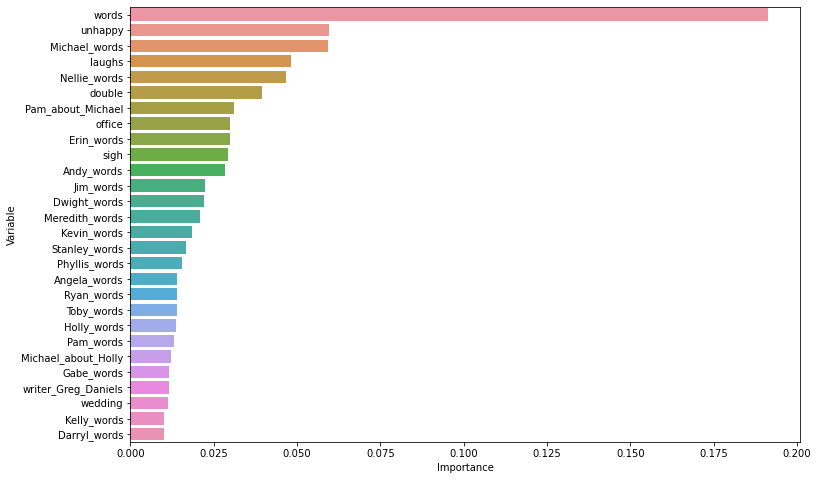

In [461]:
importance = pd.DataFrame({'Variable':x_train.columns,
              'Importance':dtree.feature_importances_}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=importance[importance.Importance > 0.01].Importance, y=importance[importance.Importance > 0.01].Variable)